In [1]:
# Import
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt

In [2]:
eng_emb = '/mnt/permanent/Language/Multi/FB/wiki.en/wiki.en.vec'
ita_emb = '/mnt/permanent/Language/Multi/FB/wiki.it/wiki.it.vec'
limit = None
limits_tr = [i*50000 for i in range(1, 16)]
limits_te = [i*50000 for i in range(1, 41)]

train_fn = '/home/eszti/projects/dipterv/panlex/data/smith/train/eng_ita.tsv'
test_fn = '/home/eszti/projects/dipterv/panlex/data/smith/test/eng_ita.tsv'

figsize_x = 8
figsize_y = 4

In [3]:
def read_emb(emb_fn, limit):
    model = KeyedVectors.load_word2vec_format(emb_fn, binary=False, limit=limit)
    return model

In [4]:
def read_word_pairs_tsv(fn, id1, id2, header=True):
    wl1 = set()
    wl2 = set()
    with open(fn) as f:
        lines = f.readlines()
        data = [(line.split()[id1], line.split()[id2]) for i, line in enumerate(lines) if i > 0 or header == False]
    for (w1, w2) in data:
        wl1.add(w1)
        wl2.add(w2)
    return data, wl1, wl2

In [5]:
def check_emb_coverage(emb, wl, limits):
    found = [[] for i in limits]    
    for w in wl:
        n_from = 0
        n_to = len(limits)
        if w in emb:
            idx = emb.index2word.index(w)
            for i, l in enumerate(limits):
                if idx > l:
                    n_from = i + 1
        else:
            # do not add any of the found lists
            n_from = len(limits)
        for i in range(n_from, n_to):
            found[i].append(w)
    return found

In [6]:
def check_wp_coverage(wp_l, found1, found2, limits):
    found = [[] for i in limits]    
    for (w1, w2) in wp_l:
        for i, l in enumerate(limits):
            if w1 in found1[i] and w2 in found2[i]:
                found[i].append((w1, w2))
    return found

In [8]:
def plot(x, y, title, xlab, ylab):
    plt.figure(figsize=(figsize_x,figsize_y))    
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.grid()
    plt.plot(x, y, 'o')
    plt.legend()
    plt.show()

In [9]:
m_en = read_emb(eng_emb, limit)
m_it = read_emb(ita_emb, limit)
len(m_en.index2word)
len(m_it.index2word)

2519370

871053

In [10]:
train_wp, tr_en, tr_it = read_word_pairs_tsv(train_fn, 0, 1)
test_wp, te_en, te_it = read_word_pairs_tsv(test_fn, 0, 1)
len(train_wp)
len(tr_en)
len(tr_it)
len(test_wp)
len(te_en)
len(te_it)

4999

3441

4548

1868

1499

1848

train en : 3441
limit - 50000 : 3441
limit - 100000 : 3441
limit - 150000 : 3441
limit - 200000 : 3441
limit - 250000 : 3441
limit - 300000 : 3441
limit - 350000 : 3441
limit - 400000 : 3441
limit - 450000 : 3441
limit - 500000 : 3441
limit - 550000 : 3441
limit - 600000 : 3441
limit - 650000 : 3441
limit - 700000 : 3441
limit - 750000 : 3441
not found: set()


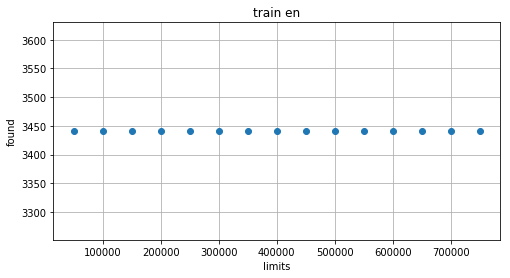

train it : 4548
limit - 50000 : 4449
limit - 100000 : 4515
limit - 150000 : 4532
limit - 200000 : 4540
limit - 250000 : 4543
limit - 300000 : 4544
limit - 350000 : 4547
limit - 400000 : 4547
limit - 450000 : 4547
limit - 500000 : 4547
limit - 550000 : 4547
limit - 600000 : 4547
limit - 650000 : 4547
limit - 700000 : 4547
limit - 750000 : 4547
not found: {'prelaurea'}


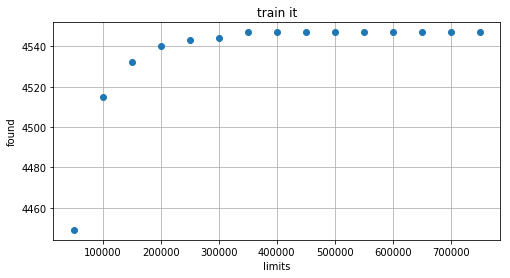

In [11]:
found_tr_en = check_emb_coverage(emb=m_en, wl=tr_en, limits=limits_tr)
found_tr_it = check_emb_coverage(emb=m_it, wl=tr_it, limits=limits_tr)

stat_tr_en = []
stat_tr_it = []

print('train en : {}'.format(len(tr_en)))
for i, l in enumerate(limits_tr):
    y = len(found_tr_en[i])
    stat_tr_en.append(y)
    print('limit - {0} : {1}'.format(l, y))
print('not found: {}'.format(set(tr_en) - set(found_tr_en[-1])))
plot(limits_tr, stat_tr_en, 'train en', 'limits', 'found')

print('train it : {}'.format(len(tr_it)))
for i, l in enumerate(limits_tr):
    y = len(found_tr_it[i])
    stat_tr_it.append(y)
    print('limit - {0} : {1}'.format(l, y))
print('not found: {}'.format(set(tr_it) - set(found_tr_it[-1])))
plot(limits_tr, stat_tr_it, 'train it', 'limits', 'found')

In [12]:
# proving that not found words are not in the embedding
'prelaurea' in m_it

False

test en : 1499
limit - 50000 : 927
limit - 100000 : 1210
limit - 150000 : 1347
limit - 200000 : 1402
limit - 250000 : 1442
limit - 300000 : 1457
limit - 350000 : 1472
limit - 400000 : 1476
limit - 450000 : 1483
limit - 500000 : 1486
limit - 550000 : 1488
limit - 600000 : 1488
limit - 650000 : 1489
limit - 700000 : 1489
limit - 750000 : 1490
limit - 800000 : 1492
limit - 850000 : 1493
limit - 900000 : 1495
limit - 950000 : 1495
limit - 1000000 : 1496
limit - 1050000 : 1496
limit - 1100000 : 1497
limit - 1150000 : 1497
limit - 1200000 : 1497
limit - 1250000 : 1497
limit - 1300000 : 1497
limit - 1350000 : 1498
limit - 1400000 : 1498
limit - 1450000 : 1498
limit - 1500000 : 1498
limit - 1550000 : 1498
limit - 1600000 : 1498
limit - 1650000 : 1498
limit - 1700000 : 1499
limit - 1750000 : 1499
limit - 1800000 : 1499
limit - 1850000 : 1499
limit - 1900000 : 1499
limit - 1950000 : 1499
limit - 2000000 : 1499
not found: set()


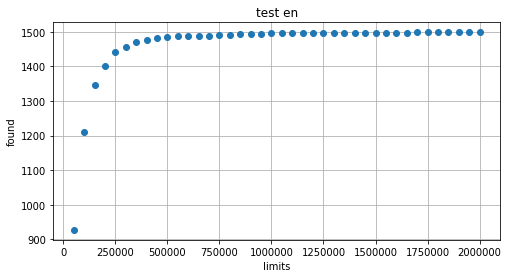

test it : 1848
limit - 50000 : 1103
limit - 100000 : 1446
limit - 150000 : 1604
limit - 200000 : 1692
limit - 250000 : 1749
limit - 300000 : 1781
limit - 350000 : 1805
limit - 400000 : 1814
limit - 450000 : 1825
limit - 500000 : 1829
limit - 550000 : 1834
limit - 600000 : 1838
limit - 650000 : 1841
limit - 700000 : 1842
limit - 750000 : 1844
limit - 800000 : 1844
limit - 850000 : 1845
limit - 900000 : 1845
limit - 950000 : 1845
limit - 1000000 : 1845
limit - 1050000 : 1845
limit - 1100000 : 1845
limit - 1150000 : 1845
limit - 1200000 : 1845
limit - 1250000 : 1845
limit - 1300000 : 1845
limit - 1350000 : 1845
limit - 1400000 : 1845
limit - 1450000 : 1845
limit - 1500000 : 1845
limit - 1550000 : 1845
limit - 1600000 : 1845
limit - 1650000 : 1845
limit - 1700000 : 1845
limit - 1750000 : 1845
limit - 1800000 : 1845
limit - 1850000 : 1845
limit - 1900000 : 1845
limit - 1950000 : 1845
limit - 2000000 : 1845
not found: {'oligopolistica', 'ridimensioni', 'kostunica'}


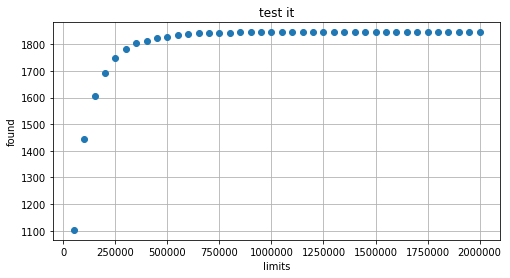

In [13]:
found_te_en = check_emb_coverage(emb=m_en, wl=te_en, limits=limits_te)
found_te_it = check_emb_coverage(emb=m_it, wl=te_it, limits=limits_te)

stat_te_en = []
stat_te_it = []

print('test en : {}'.format(len(te_en)))
for i, l in enumerate(limits_te):
    y = len(found_te_en[i])
    stat_te_en.append(y)
    print('limit - {0} : {1}'.format(l, y))
print('not found: {}'.format(set(te_en) - set(found_te_en[-1])))
plot(limits_te, stat_te_en, 'test en', 'limits', 'found')

print('test it : {}'.format(len(te_it)))
for i, l in enumerate(limits_te):
    y = len(found_te_it[i])
    stat_te_it.append(y)
    print('limit - {0} : {1}'.format(l, y))
print('not found: {}'.format(set(te_it) - set(found_te_it[-1])))
plot(limits_te, stat_te_it, 'test it', 'limits', 'found')

In [14]:
# proving that not found words are not in the embedding
'ridimensioni' in m_it
'kostunica' in m_it
'oligopolistica' in m_it

False

False

False

train : 4999
limit - 50000 : 4899
limit - 100000 : 4966
limit - 150000 : 4983
limit - 200000 : 4991
limit - 250000 : 4994
limit - 300000 : 4995
limit - 350000 : 4998
limit - 400000 : 4998
limit - 450000 : 4998
limit - 500000 : 4998
limit - 550000 : 4998
limit - 600000 : 4998
limit - 650000 : 4998
limit - 700000 : 4998
limit - 750000 : 4998
not found: {('undergraduate', 'prelaurea')}


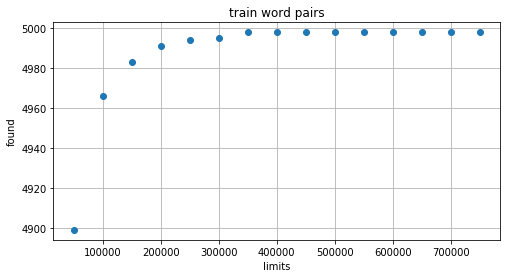

test : 1868
limit - 50000 : 993
limit - 100000 : 1341
limit - 150000 : 1535
limit - 200000 : 1639
limit - 250000 : 1727
limit - 300000 : 1768
limit - 350000 : 1803
limit - 400000 : 1815
limit - 450000 : 1832
limit - 500000 : 1838
limit - 550000 : 1844
limit - 600000 : 1848
limit - 650000 : 1851
limit - 700000 : 1852
limit - 750000 : 1855
limit - 800000 : 1858
limit - 850000 : 1860
limit - 900000 : 1862
limit - 950000 : 1862
limit - 1000000 : 1862
limit - 1050000 : 1862
limit - 1100000 : 1863
limit - 1150000 : 1863
limit - 1200000 : 1863
limit - 1250000 : 1863
limit - 1300000 : 1863
limit - 1350000 : 1864
limit - 1400000 : 1864
limit - 1450000 : 1864
limit - 1500000 : 1864
limit - 1550000 : 1864
limit - 1600000 : 1864
limit - 1650000 : 1864
limit - 1700000 : 1865
limit - 1750000 : 1865
limit - 1800000 : 1865
limit - 1850000 : 1865
limit - 1900000 : 1865
limit - 1950000 : 1865
limit - 2000000 : 1865
not found: {('oligopolistic', 'oligopolistica'), ('kostunica', 'kostunica'), ('downsize',

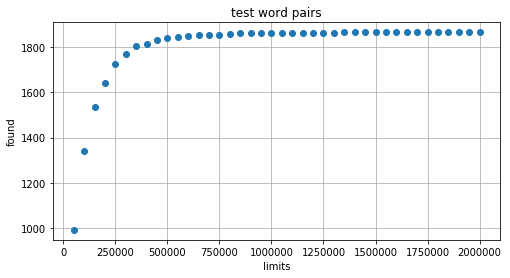

In [15]:
found_tr_wp = check_wp_coverage(train_wp, found_tr_en, found_tr_it, limits_tr)
found_te_wp = check_wp_coverage(test_wp, found_te_en, found_te_it, limits_te)

stat_tr_wp = []
stat_te_wp = []

print('train : {}'.format(len(train_wp)))
for i, l in enumerate(limits_tr):
    y = len(found_tr_wp[i])
    stat_tr_wp.append(y)
    print('limit - {0} : {1}'.format(l, y))
print('not found: {}'.format(set(train_wp) - set(found_tr_wp[-1])))
plot(limits_tr, stat_tr_wp, 'train word pairs', 'limits', 'found')

print('test : {}'.format(len(test_wp)))
for i, l in enumerate(limits_te):
    y = len(found_te_wp[i])
    stat_te_wp.append(y)
    print('limit - {0} : {1}'.format(l, y))
print('not found: {}'.format(set(test_wp) - set(found_te_wp[-1])))
plot(limits_te, stat_te_wp, 'test word pairs', 'limits', 'found')

In [16]:
def print_all():
    plt.figure(figsize=(figsize_x, figsize_y))
    plt.title('train')
    plt.xlabel('limit')
    plt.ylabel('found')
    plt.grid()
    plt.plot(limits_tr, stat_tr_en, 'ro', label='en: {}'.format(len(tr_en)))
    plt.plot(limits_tr, stat_tr_it, 'bo', label='it: {}'.format(len(tr_it)))
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(figsize_x, figsize_y))
    plt.title('test')
    plt.xlabel('limit')
    plt.ylabel('found')
    plt.grid()
    plt.plot(limits_te, stat_te_en, 'ro', label='en: {}'.format(len(te_en)))
    plt.plot(limits_te, stat_te_it, 'bo', label='it: {}'.format(len(te_it)))
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(figsize_x,figsize_y))
    plt.title('word pairs')
    plt.xlabel('limit')
    plt.ylabel('found')
    plt.grid()
    plt.plot(limits_tr, stat_tr_wp, 'ro', label='train: {}'.format(len(train_wp)))
    plt.plot(limits_te, stat_te_wp, 'bo', label='test: {}'.format(len(test_wp)))
    plt.legend()
    plt.show()

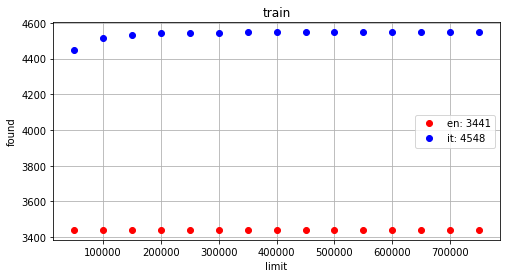

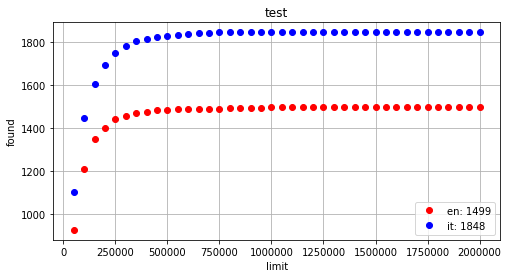

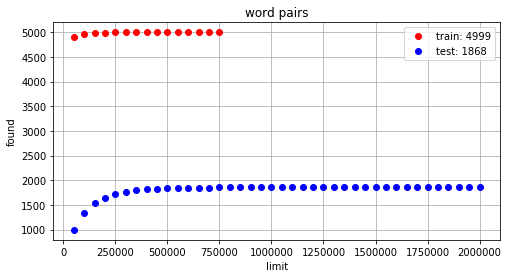

In [17]:
print_all()